In [12]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from itertools import combinations

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, Y = mnist.data, mnist.target.astype(int)
X = X.to_numpy()
Y = Y.to_numpy()

In [3]:
ZEROS = X[Y == 0]
ONES = X[Y == 1]
data = np.concatenate([ZEROS, ONES])

In [4]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

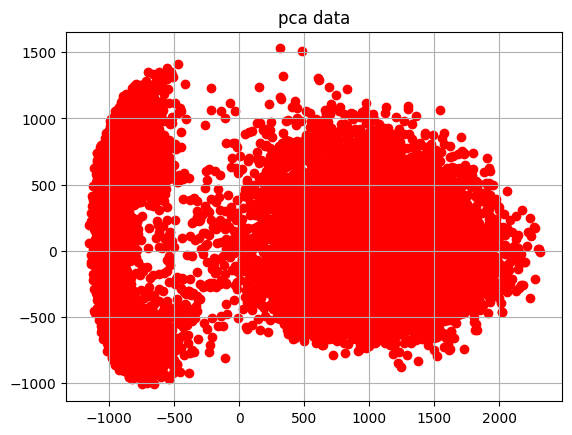

In [5]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], color='red')
plt.grid()
plt.title('pca data')
plt.show()

In [8]:
gmm = GaussianMixture(n_components=2)
gmm.fit(pca_data)

GaussianMixture(n_components=2)

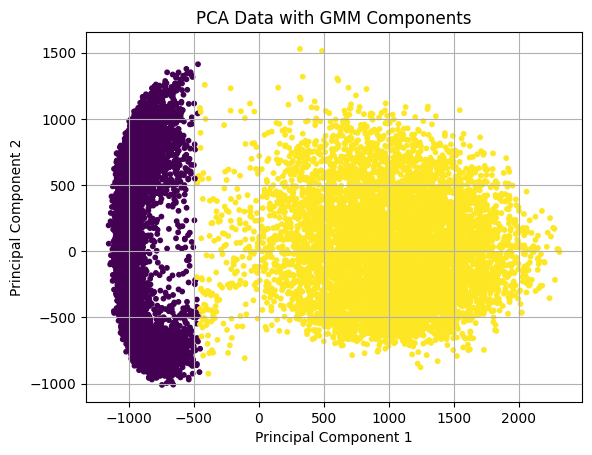

In [11]:
labels = gmm.predict(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', s=10)
plt.grid()
plt.title('PCA Data with GMM Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [61]:
np.sqrt(np.sum(np.power(gmm.means_[0] - gmm.means_[1], 2)))

1915.6759421186396

In [62]:
mean_1_inverse = pca.inverse_transform(gmm.means_[0])
mean_2_inverse = pca.inverse_transform(gmm.means_[1])

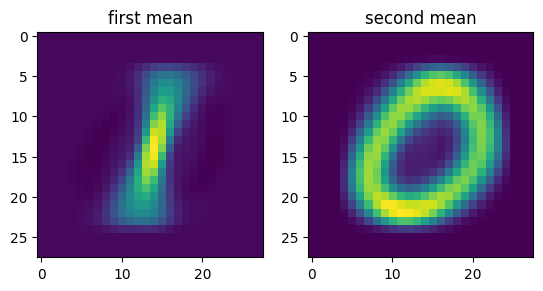

In [63]:
plt.subplot(1, 2, 1)
plt.imshow(mean_1_inverse.reshape(28, 28))
plt.title('first mean')
plt.subplot(1, 2, 2)
plt.imshow(mean_2_inverse.reshape(28, 28))
plt.title('second mean')
plt.show()

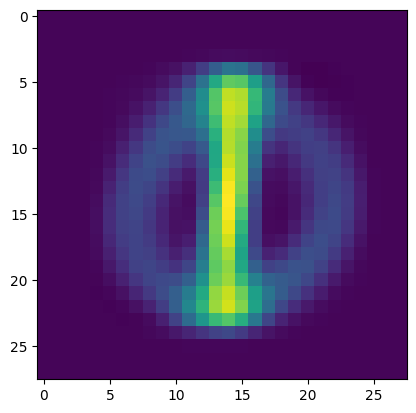

In [79]:
min_distance_idx = np.argsort(np.abs(gmm.predict_proba(pca_data)[:, 0] - gmm.predict_proba(pca_data)[:, 1]))[0]
min_dist_inverse = pca.inverse_transform(pca_data[min_distance_idx])
plt.imshow(min_dist_inverse.reshape(28, 28))
plt.show()

In [13]:
max_distance = 0
min_distance = float('inf')
max_pair = None
min_pair = None

for class1, class2 in combinations(range(10), 2):
    data_class1 = X[Y == class1]
    data_class2 = X[Y == class2]
    data = np.concatenate([data_class1, data_class2])
    
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data)
    
    gmm = GaussianMixture(n_components=2)
    gmm.fit(pca_data)
    
    distance = np.linalg.norm(gmm.means_[0] - gmm.means_[1])
    
    if distance > max_distance:
        max_distance = distance
        max_pair = (class1, class2)
    
    if distance < min_distance:
        min_distance = distance
        min_pair = (class1, class2)

print(f'Pair with highest distance: {max_pair}, Distance: {max_distance}')
print(f'Pair with shortest distance: {min_pair}, Distance: {min_distance}')

Pair with highest distance: (0, 1), Distance: 1915.6682427657624
Pair with shortest distance: (4, 9), Distance: 979.8457119198895
